# 4. Изучение закономерностей, определяющих успешность игр

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn 
import seaborn as sns
from scipy import stats as st
import numpy as np
plt.style.use("ggplot")

df = pd.read_csv('games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


                                       Предобработка данных

Переведем названия столбцов в нижний регистр

In [2]:
df.columns = df.columns.str.lower()

Выведем основную информацию о датафрейме

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


                                    Описание данных
                                    
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).
Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Построим общую гистограмму для всех столбцов

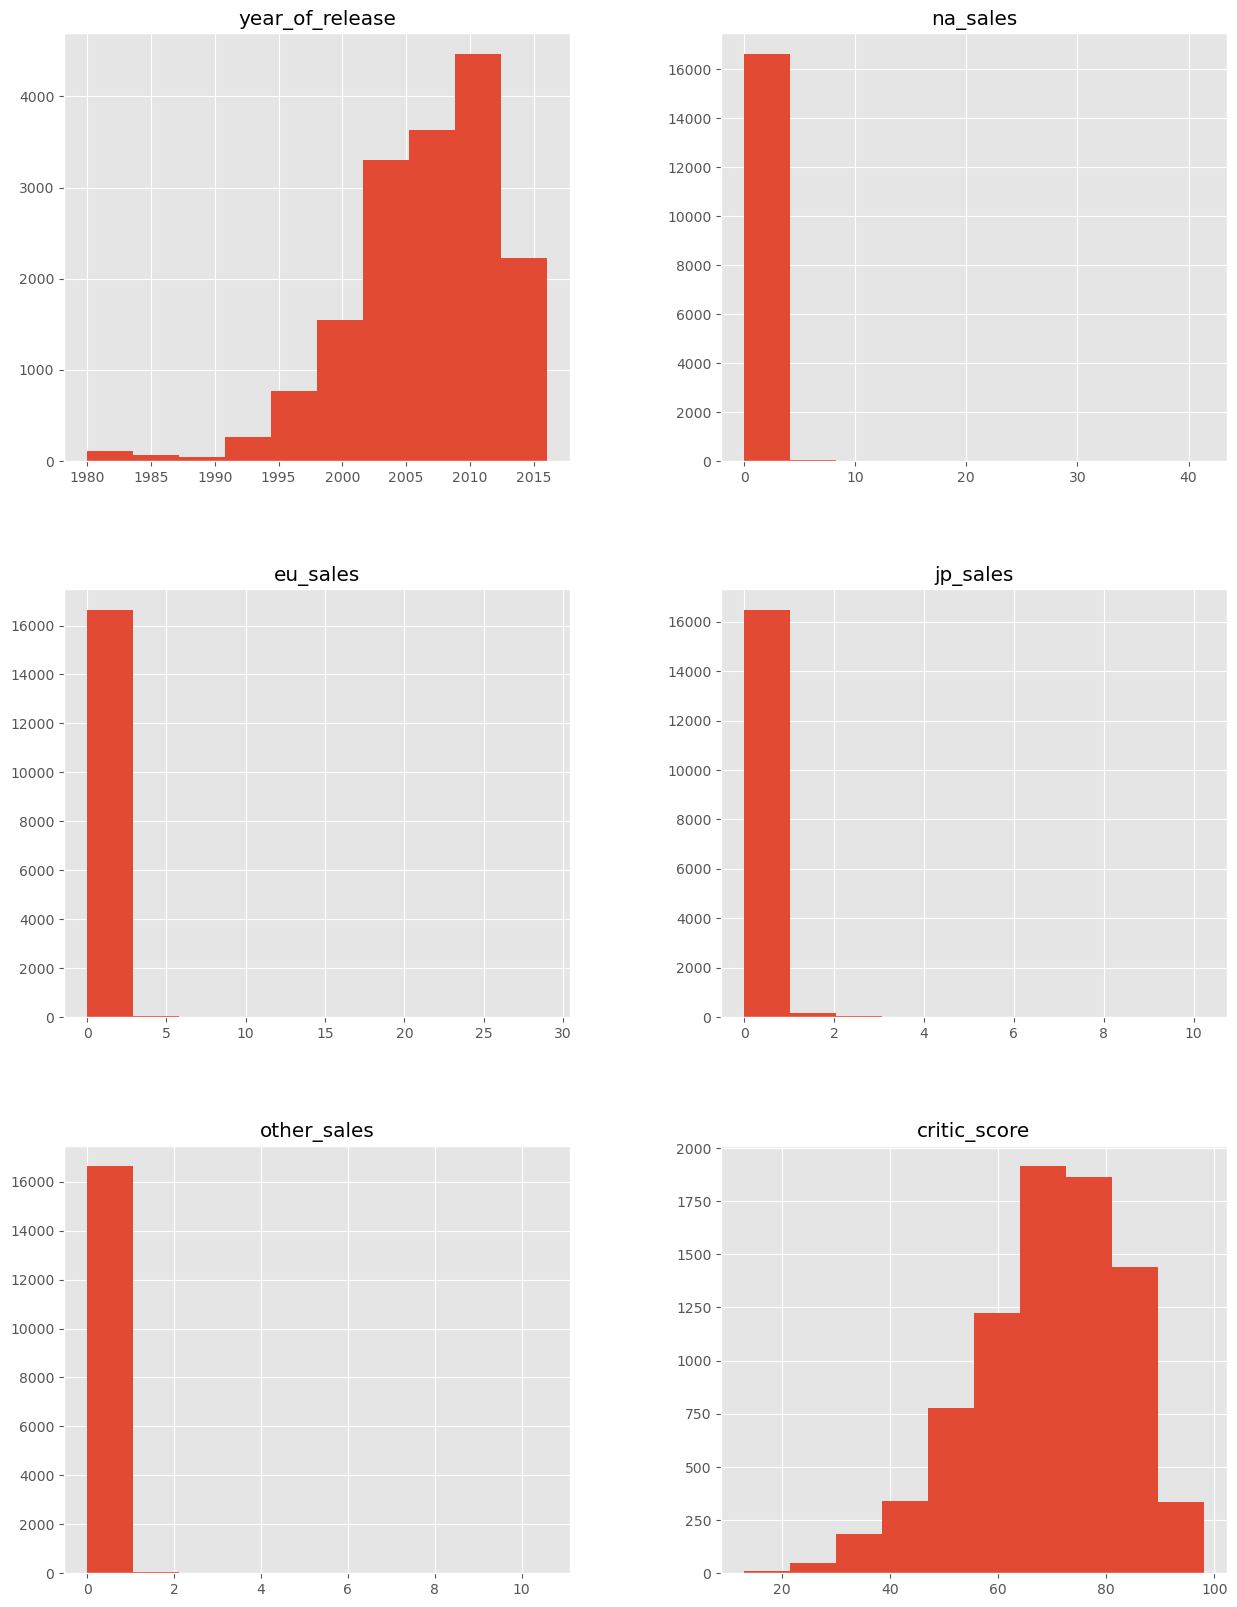

In [4]:
df.hist(figsize=(15, 20))
plt.show()

In [5]:
len(df)

16715

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Количество явных дубликатов

In [7]:
df.duplicated().sum()

0

Изучим пропущенные значения в столбцах

In [8]:
df.isna().mean().sort_values(ascending=False)

critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

В 6 столбцах есть пустые ячейки

столбец ['name'] отвечает за название компьютерной игры. По данной ячейке мы не можем рассчитать среднее значение или медиану. Оставить его пустым тоже нельзя, т.к. непонятно о какой видеоигре идет речь, поэтому мы принимаем решение удалить эти 2 строки, иначе они повлияют на нашу статистику. На счет появления пропуска в данном столбце можно сказать, что или его забыли указать при заведении данных, или у игры не было утверждено официальное название и поэтому ячейка оказалась пуста.


в столбцах ['critic_score'], ['user_score'] заменим 0, т.к. пропуски могут повлиять на дальнейшую аналитику. Причиной отсутствия рейтинга может быть просто отсутствие оценок (неоцененные игры) или же игры были недавнего вышедшие и еще не получили свои оценки.


со столбцом ['year_of_release'] есть названия игр с указанием года выпуска и в итоге будет выглядеть не совсем логично (на примере ИД16373 игра с названием 'PDC World Championship Darts 2008' и год не указан) Поэтому предлагаю удалить пропуска, чтобы не было нелогичного установления года выпуска. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре забыли указать или точная дата выхода игры точно не определена.


столбец ['genre'] так же сложно подвести к какому-либо значению, т.к. необходимо знать конкретную игру. Так же удаляем строки с пустыми значениями. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре его забыли указать или не определились к какому именно жанру относится видеоигра.


столбец ['rating'] так же заменим 0, т.к. мы не сможем понять возрастное ограничение, если не будем знать это точно.

In [9]:
df['critic_score'] = df['critic_score'].fillna(0).astype(int)
df['rating'] = df['rating'].fillna(0)
df = df.dropna(subset=['name','year_of_release','genre'])

                                  Исследовательский анализ данных

In [10]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0,NaN,0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0,NaN,0
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0,NaN,0
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0,NaN,0
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0,NaN,0


Типы переменных

- Количественная переменная принимает числовое значение в диапазоне: её также называют численной.

- Категориальная переменная принимает значение из ограниченного набора. Другое название категориальной переменной — качественная.

Категориальная


'name', 'platform', 'genre', 'critic_score', 'user_score', 'rating'


Количественная

 year_of_release, na_sales, eu_sales, jp_sales, other_sales, critic_score

In [11]:
df.describe().round(1)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16444.0,16444.0,16444.0,16444.0,16444.0,16444.0
mean,2006.5,0.3,0.1,0.1,0.0,33.5
std,5.9,0.8,0.5,0.3,0.2,35.8
min,1980.0,0.0,0.0,0.0,0.0,0.0
25%,2003.0,0.0,0.0,0.0,0.0,0.0
50%,2007.0,0.1,0.0,0.0,0.0,0.0
75%,2010.0,0.2,0.1,0.0,0.0,70.0
max,2016.0,41.4,29.0,10.2,10.6,98.0


Count — количество значений.

Mean — среднее значение.

Std — стандартное отклонение значения.

Min — минимальное значение.

Max — максимальное значение.

25% — первый квартиль, означающий, что 25% значений в столбце ниже этого значения.

50% — медиана, означающая, что половина значений в столбце ниже этого значения.

75% — третий квартиль, означающий, что 75% значений в столбце ниже этого значения.

Эти показатели помогают понять, как распределены значения в столбце. Они также позволяют увидеть, есть ли в столбце какие-либо выбросы.

                 Исследуем уникальность значений

Набор всех уникальных значений в столбце

In [12]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Количество всех уникальных значений в столбце

In [13]:
df['name'].nunique()

11426

Набор всех уникальных значений в столбце

In [14]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Количество всех уникальных значений в столбце

In [15]:
df['platform'].nunique()

31

Набор всех уникальных значений в столбце

In [16]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Количество всех уникальных значений в столбце

In [17]:
df['genre'].nunique()

12

                  Проанализируем столбец na_sales на наличие выбросов:

Диаграмма размаха

<AxesSubplot:>

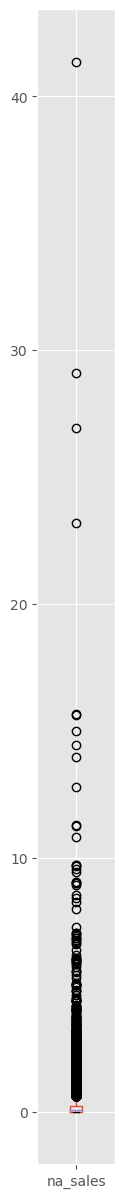

In [18]:
df.boxplot(column='na_sales', grid=True, figsize=(1, 15))

Из диаграммы видно, что значения более 20 являются редкими, и их можно отбросить. Сформируем набор данных, исключив эти значения:

In [19]:
df = df.query('na_sales <= 20').reset_index(drop=True)

                               Проанализируем столбец eu_sales на наличие выбросов:

Диаграмма размаха

<AxesSubplot:>

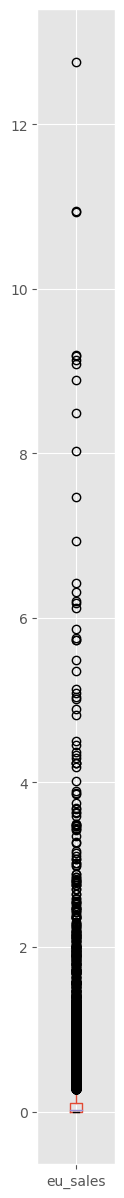

In [20]:
df.boxplot(column='eu_sales', grid=True, figsize=(1, 15))

Из диаграммы видно, что значения более 10 являются редкими, и их можно отбросить. Сформируем набор данных, исключив эти значения:

In [21]:
df = df.query('eu_sales <= 10').reset_index(drop=True)

                          Проанализируем столбец jp_sales на наличие выбросов:

Диаграмма размаха

<AxesSubplot:>

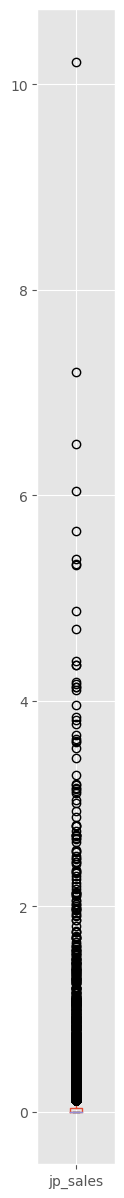

In [22]:
df.boxplot(column='jp_sales', grid=True, figsize=(1, 15))

Из диаграммы видно, что значения более 6 являются редкими, и их можно отбросить. Сформируем набор данных, исключив эти значения:

In [23]:
df = df.query('jp_sales <= 6').reset_index(drop=True)

                Проанализируем столбец other_sales на наличие выбросов:

Диаграмма размаха

<AxesSubplot:>

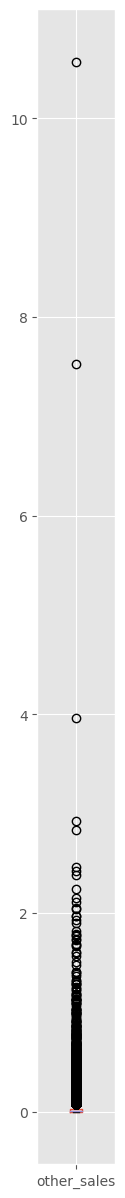

In [24]:
df.boxplot(column='other_sales', grid=True, figsize=(1, 15))

Из диаграммы видно, что значения более 4 являются редкими, и их можно отбросить. Сформируем набор данных, исключив эти значения:

In [25]:
df = df.query('other_sales <= 4').reset_index(drop=True)

In [26]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58,6.6,E
1,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87,8.4,E
2,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91,8.6,E
3,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80,7.7,E
4,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61,6.3,E
...,...,...,...,...,...,...,...,...,...,...,...
16426,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0,NaN,0
16427,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0,NaN,0
16428,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0,NaN,0
16429,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0,NaN,0


Добавим столбец с суммарными продажами во всех регионах

In [27]:
df['sales_sum'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

                                Рассмотрим каждую колонку подробнее

Text(0, 0.5, 'Количество игр, млн')

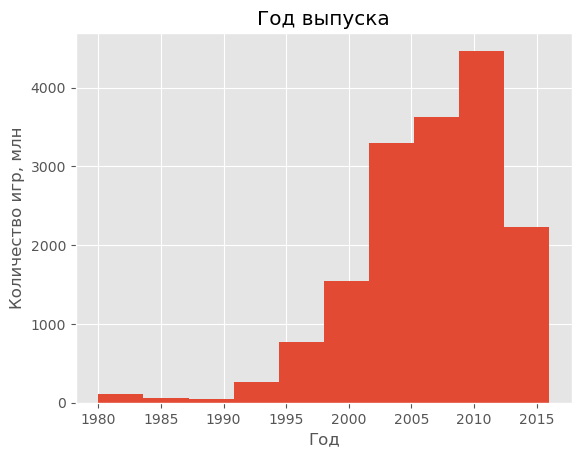

In [28]:
df['year_of_release'].hist()
plt.title('Год выпуска')
plt.xlabel('Год')
plt.ylabel('Количество игр, млн')

Text(0, 0.5, 'Количество игр, млн')

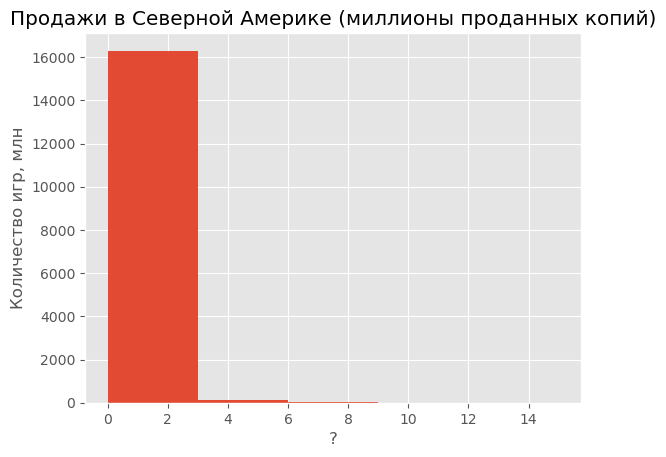

In [29]:
df['na_sales'].hist(bins=5)
plt.title('Продажи в Северной Америке (миллионы проданных копий)')
plt.xlabel('?')
plt.ylabel('Количество игр, млн')

<AxesSubplot:>

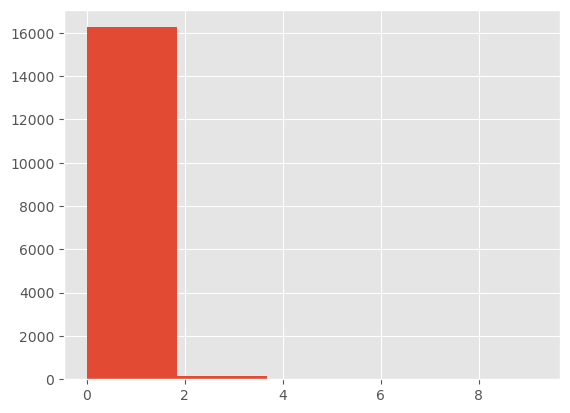

In [30]:
df['eu_sales'].hist(bins=5)

<AxesSubplot:>

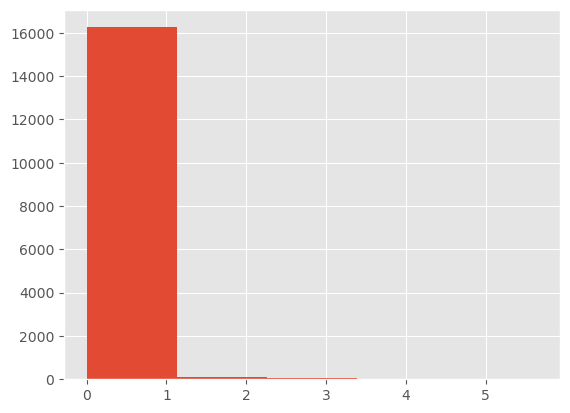

In [31]:
df['jp_sales'].hist(bins=5)

<AxesSubplot:>

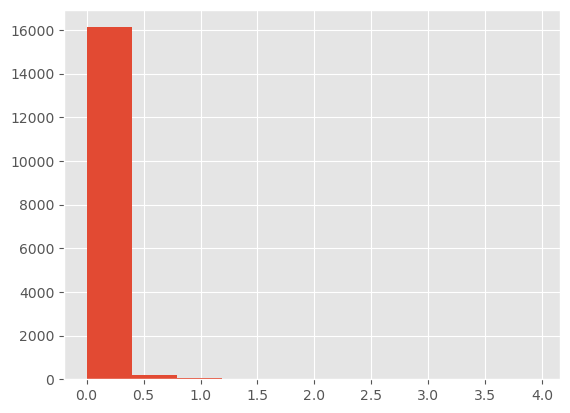

In [32]:
df['other_sales'].hist()

<AxesSubplot:>

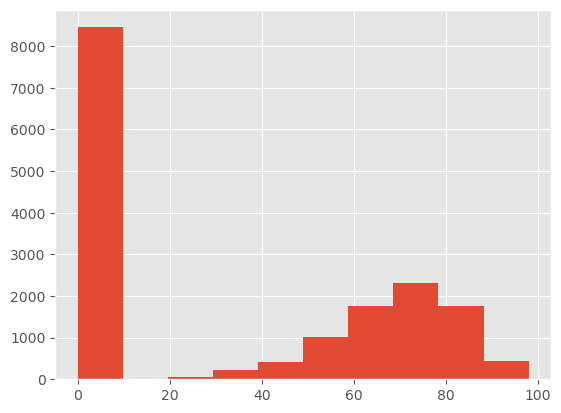

In [33]:
df['critic_score'].hist()

In [34]:
df['user_score'].value_counts(dropna=False)

NaN    6598
tbd    2376
7.8     322
8       283
8.2     276
       ... 
1.9       2
9.6       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

оценка пользователей tbd

To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется

можем заменить значение на 0 

In [35]:
df = df.replace('tbd', '0')
df['user_score'] = df['user_score'].fillna(0).astype(float)

In [36]:
df['platform'].value_counts(dropna=False)

PS2     2125
DS      2118
PS3     1306
Wii     1283
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       96
GB        94
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [37]:
df['genre'].value_counts(dropna=False)

Action          3306
Sports          2304
Misc            1721
Role-Playing    1478
Shooter         1295
Adventure       1293
Racing          1224
Platform         876
Simulation       856
Fighting         837
Strategy         673
Puzzle           568
Name: genre, dtype: int64

In [38]:
df['rating'].value_counts(dropna=False)

0       6669
E       3916
T       2905
M       1535
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет).

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. 

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет

K-A для детей и взрослых: игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в E.

RP	Категория ещё не присвоена.

AO	Подходит для взрослых старше 18 лет. 

Раз аббривиатура 'K-A' была переименована на 'E', заменим так же в таблице

In [39]:
df = df.replace('K-A', 'E')

In [40]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
1,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
2,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91,8.6,E,23.21
3,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80,7.7,E,22.70
4,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
...,...,...,...,...,...,...,...,...,...,...,...,...
16426,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16427,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0,0.0,0,0.01
16428,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16429,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0,0.0,0,0.01


Создадим отдельную таблицу для проведения общих расчетов

In [41]:
df1 = df

Сгруппирую данные

In [42]:
group_1 = df.groupby(['platform', 'year_of_release'])['name'].count()
group_1

platform  year_of_release
2600      1980.0              9
          1981.0             46
          1982.0             36
          1983.0             11
          1984.0              1
                             ..
XB        2008.0              1
XOne      2013.0             19
          2014.0             61
          2015.0             80
          2016.0             87
Name: name, Length: 238, dtype: int64

Топ 10 популярных платформ

In [43]:
platforms_ascending = df.pivot_table(index = 'platform', values = 'sales_sum', aggfunc = 'sum').sort_values(by = 'sales_sum', ascending = False)
top10_platforms = platforms_ascending.reset_index()
iloc_top10_platforms = top10_platforms.iloc[0:10]
top10_platforms = iloc_top10_platforms['platform'].unique()
platforms_ascending

,sales_sum
platform,
PS2,1201.10
X360,961.24
PS3,931.34
Wii,740.35
DS,730.07
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Количество выпущенных игр по годам

In [44]:
group_2 = df.groupby(['year_of_release'])['name'].count()
group_2

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      13
1985.0      13
1986.0      21
1987.0      16
1988.0      15
1989.0      16
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     262
1997.0     289
1998.0     379
1999.0     337
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     760
2005.0     938
2006.0    1003
2007.0    1197
2008.0    1426
2009.0    1425
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Оставим в выгрузке только нужные года

In [45]:
df = df.query("2015 <= year_of_release <= 2016")

Построим график распределения по годам

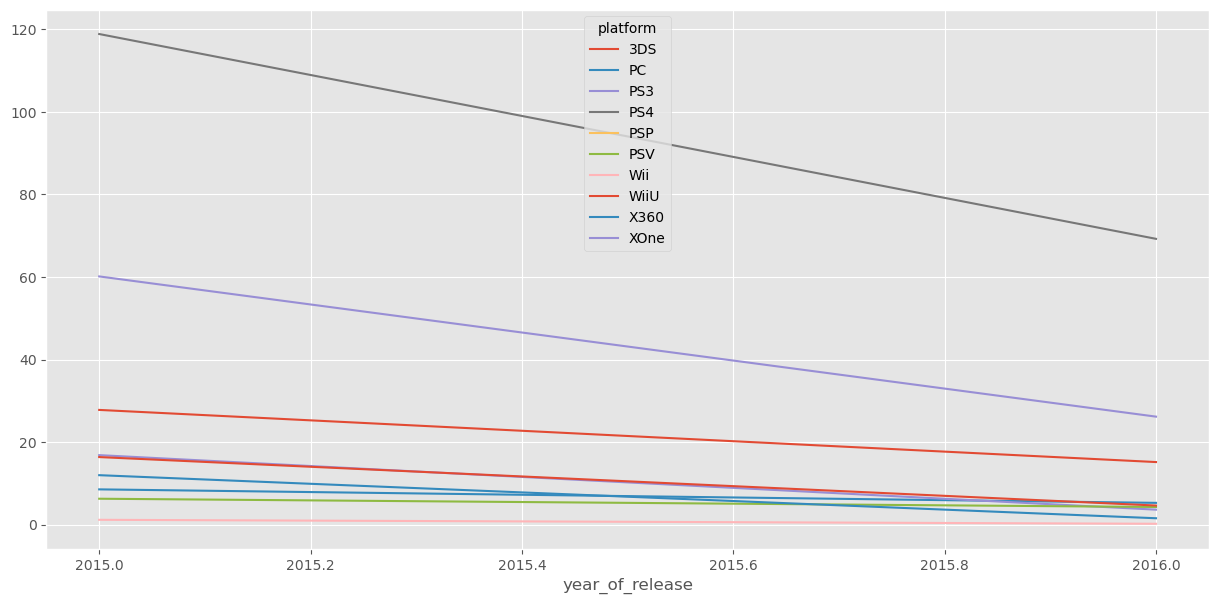

In [46]:
df.pivot_table(index='year_of_release', columns = 'platform', values='sales_sum', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

Из данной выгрузки мы можем выделить две игровые платформы с наибольшими суммарными продажами.

Это платформы: PS4, Xbox One,

Тем самым мы отсеиваем мало продаваемые позиции и устаревшие.

Сделаем выборку нужных годов 

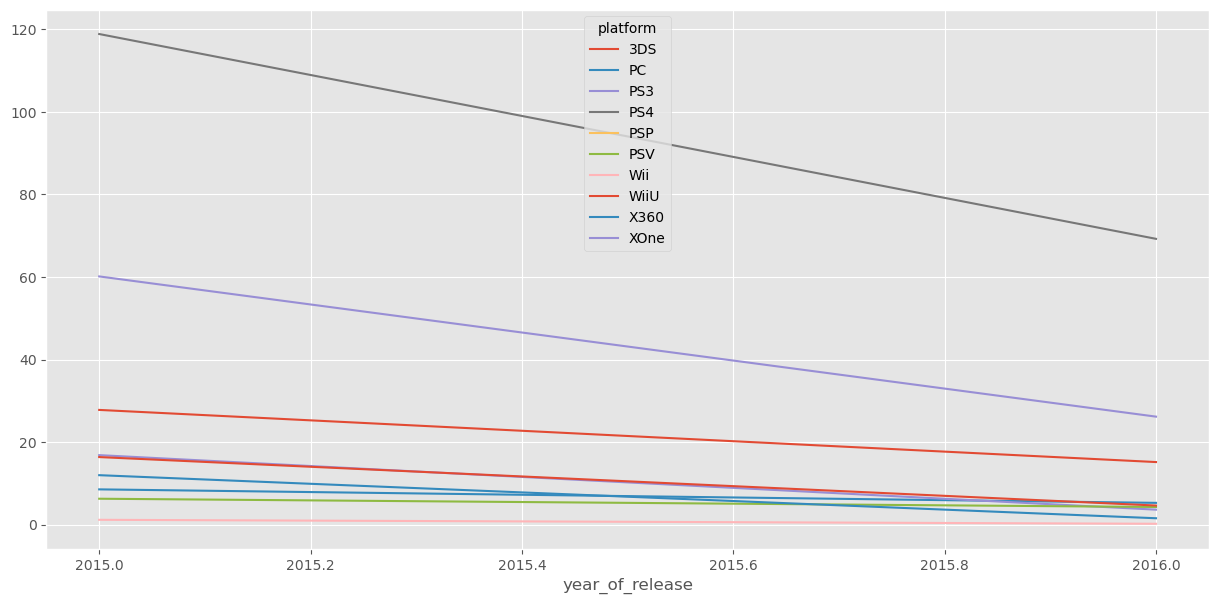

In [47]:
df = df.query("2015 <= year_of_release <= 2016")
df.pivot_table(index='year_of_release', columns = 'platform', values='sales_sum', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

Посмотрим медиану

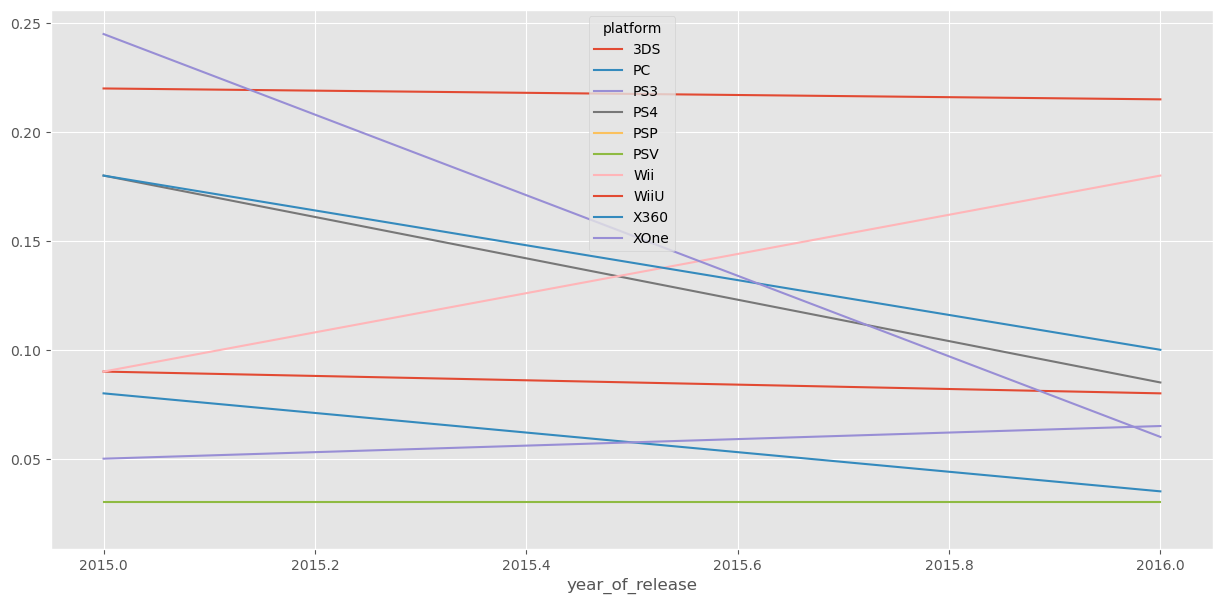

In [48]:
df.pivot_table(index='year_of_release', columns = 'platform', values='sales_sum', aggfunc='median').plot(grid=True, figsize=(15, 7))
plt.show()

Сравним с общей таблицей

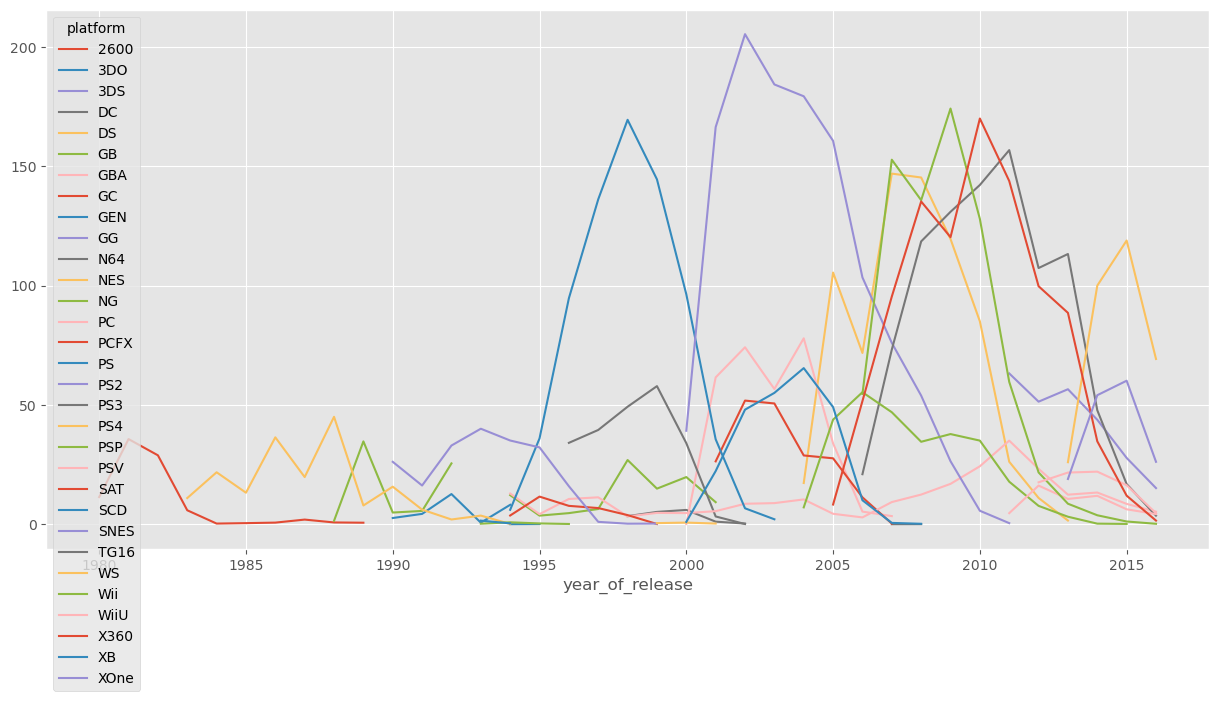

In [49]:
df1.pivot_table(index='year_of_release', columns = 'platform', values='sales_sum', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

Медиана

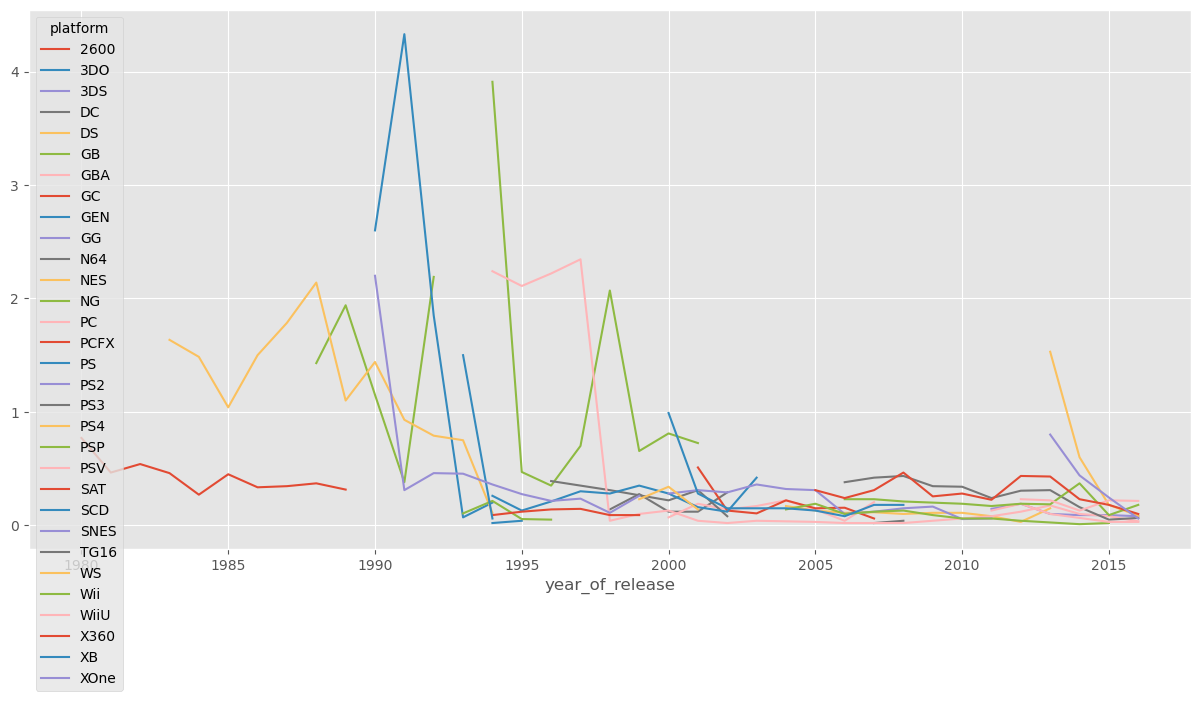

In [50]:
df1.pivot_table(index='year_of_release', columns = 'platform', values='sales_sum', aggfunc='median').plot(grid=True, figsize=(15, 7))
plt.show()

In [51]:
df.groupby('platform')['sales_sum'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
PSP,3.0,0.040000,0.034641,0.02,0.020,0.020,0.0500,0.08
PSV,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
Wii,5.0,0.264000,0.390487,0.01,0.030,0.150,0.1800,0.95
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
X360,48.0,0.280833,0.381207,0.01,0.040,0.110,0.3525,1.70


Диаграмма размаха

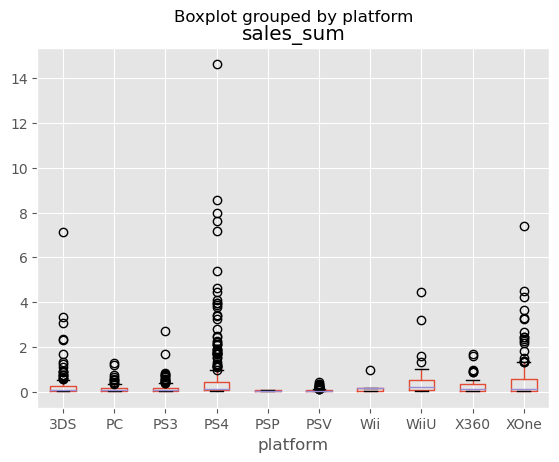

In [52]:
df.boxplot(column='sales_sum', by='platform')
plt.show()

Уменьшим с диапазон

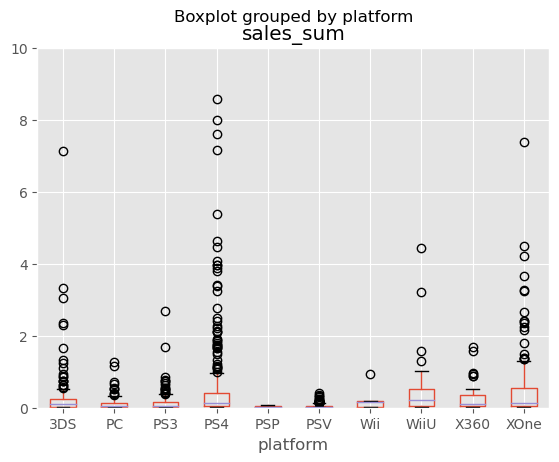

In [53]:
df.boxplot(column='sales_sum', by='platform')
plt.ylim(0, 10)
plt.show()

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Для диагностики возьмем платформу PS4, т.к. у этой платформы значительные продажи в 2016 году.

Таблица рассеивания

Выведем таблицу рассеивания по платформе отобразив отзывы пользователей

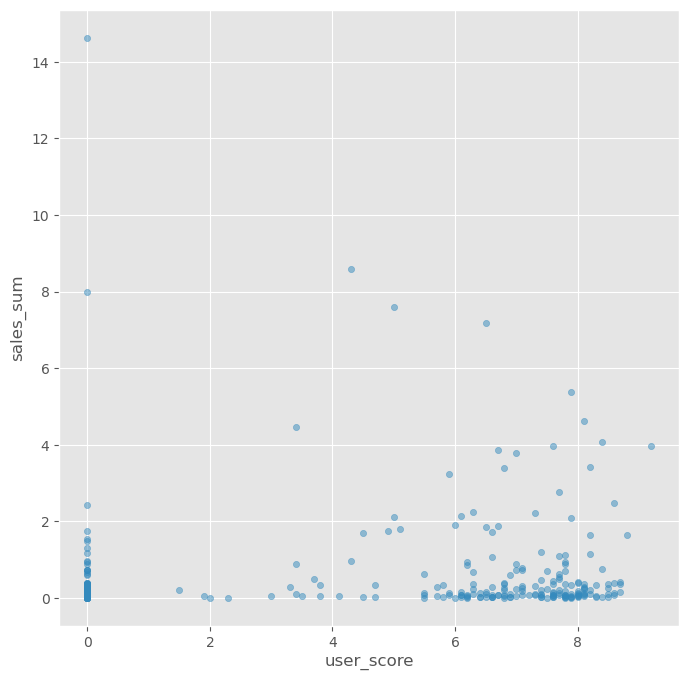

In [54]:
df[df['platform'] == 'PS4'].plot(x = 'user_score', y = 'sales_sum', kind = 'scatter', alpha = 0.5, figsize = (8,8), grid = True)
plt.show()

Выведем таблицу рассеивания по платформе отобразив отзывы критиков

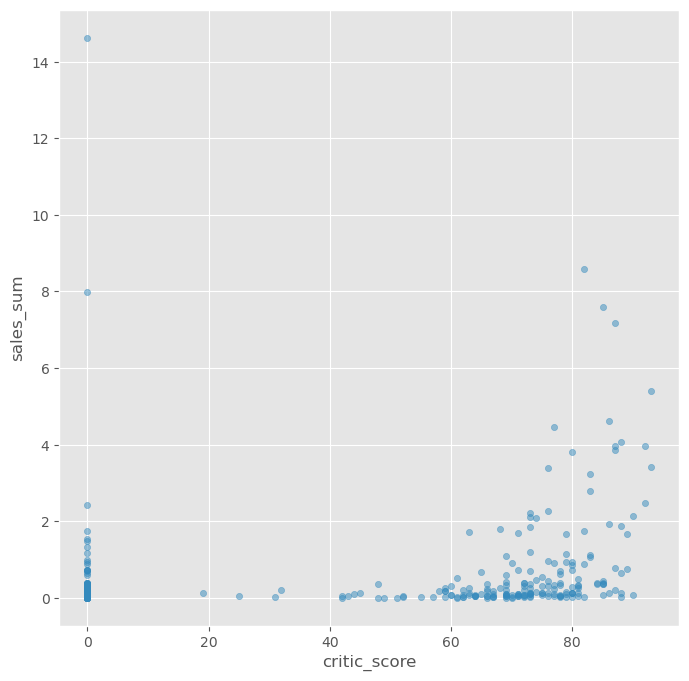

In [55]:
df[df['platform']=='PS4'].plot(x='critic_score', y='sales_sum', kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
plt.show()

Посчитаем корреляцию между отзывами и продажами

In [56]:
df[['critic_score','user_score','sales_sum']].corr()

,critic_score,user_score,sales_sum
critic_score,1.000000,0.804474,0.218718
user_score,0.804474,1.000000,0.139792
sales_sum,0.218718,0.139792,1.000000


<AxesSubplot:>

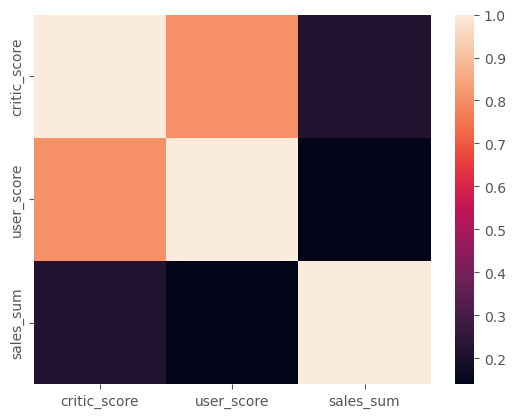

In [57]:
sns.heatmap(df[['critic_score','user_score','sales_sum']].corr())

In [58]:
df['critic_score'].corr(df['sales_sum'])

0.2187182659521023

In [59]:
df['user_score'].corr(df['sales_sum'])

0.1397915988645013

Корреляция говорит о наличии связи, однако не слишком сильной.
Но оценки критиков влияют больше чем оценки пользователей 

Оставим в выгрузке только интересующие нас платформы

In [60]:
df_plat = df.query("platform == ['XOne', 'PS4']")
df_plat

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
19,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
64,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
74,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98
81,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
86,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,0,0.0,0,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16346,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
16359,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,0,6.6,E,0.01
16361,ZombiU,XOne,2016.0,Action,0.00,0.01,0.00,0.00,0,0.0,0,0.01
16376,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74,6.7,0,0.01


График продаж по прибыльным платформам

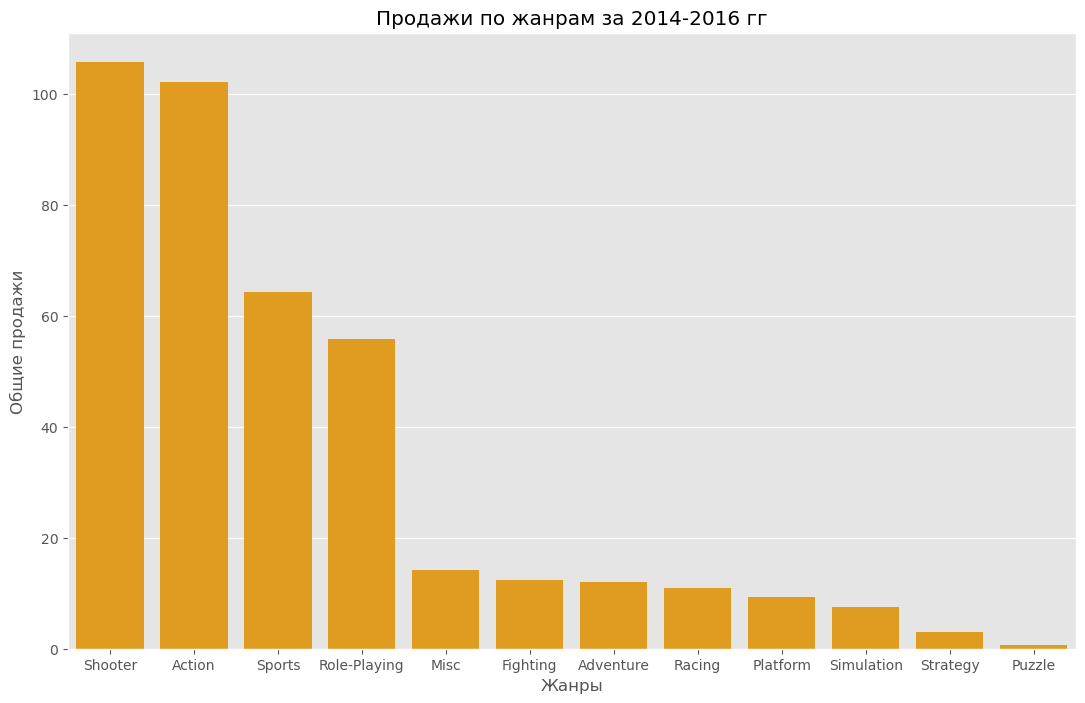

In [61]:
platform_sales_fresh = (
    df
    .pivot_table(index='genre', values='sales_sum', aggfunc='sum')
    .sort_values('sales_sum', ascending=False)
)

plt.figure(figsize=(13, 8))
(sns.barplot(data = platform_sales_fresh, x = platform_sales_fresh.index, y = 'sales_sum', color = 'orange')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Жанры', ylabel = 'Общие продажи'))

plt.show()

График продаж по актуальным платформам

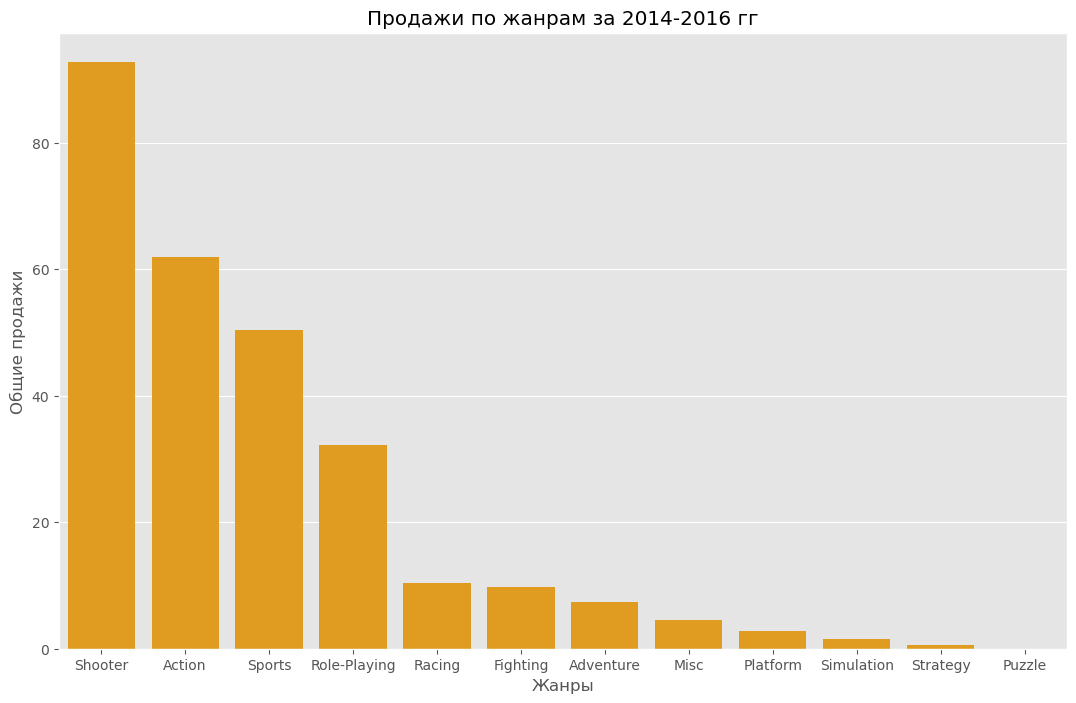

In [62]:
 platform_sales_fresh = (
    df_plat
    .pivot_table(index='genre', values='sales_sum', aggfunc='sum')
    .sort_values('sales_sum', ascending=False)
)

plt.figure(figsize=(13, 8))
(sns.barplot(data = platform_sales_fresh, x = platform_sales_fresh.index, y = 'sales_sum', color = 'orange')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Жанры', ylabel = 'Общие продажи'))

plt.show()

Самые прибыльные жанры являются шутеры и экшены. Значения их продаж почти доходят до 140 млн проданных копий. 

ТОП 5 можно отметить следующие жанры:
- shooter
- action
- sports
- role-playing
- misc

по потенциально прибыльным

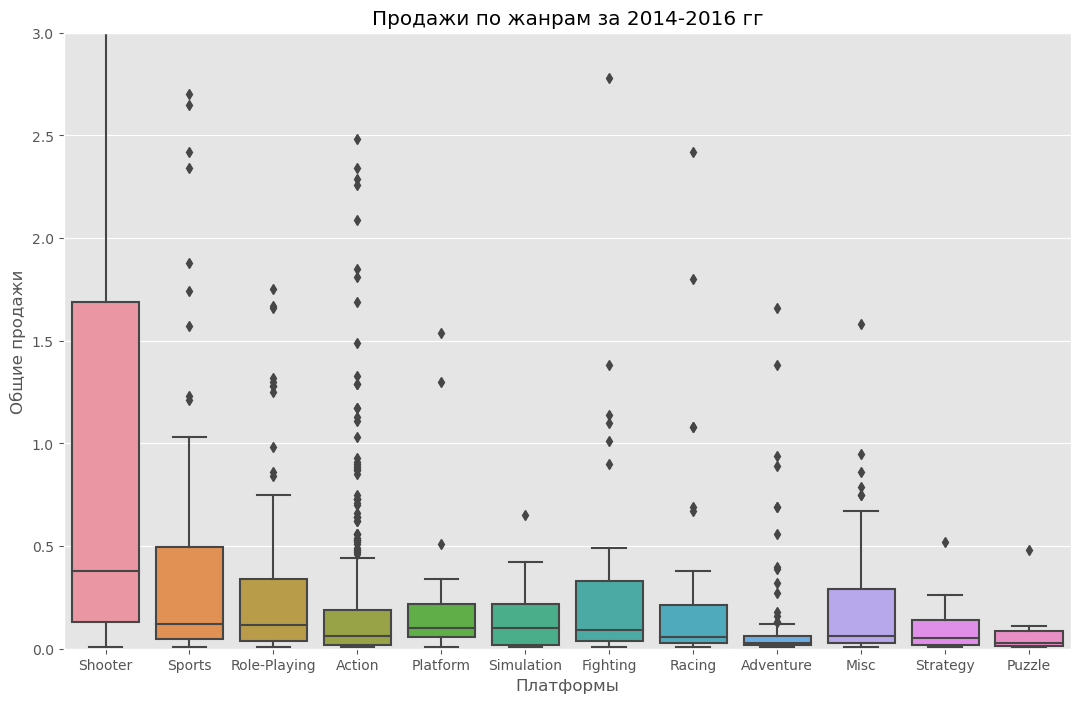

In [63]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = df, y = 'sales_sum', x='genre')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

По актуальным платформам

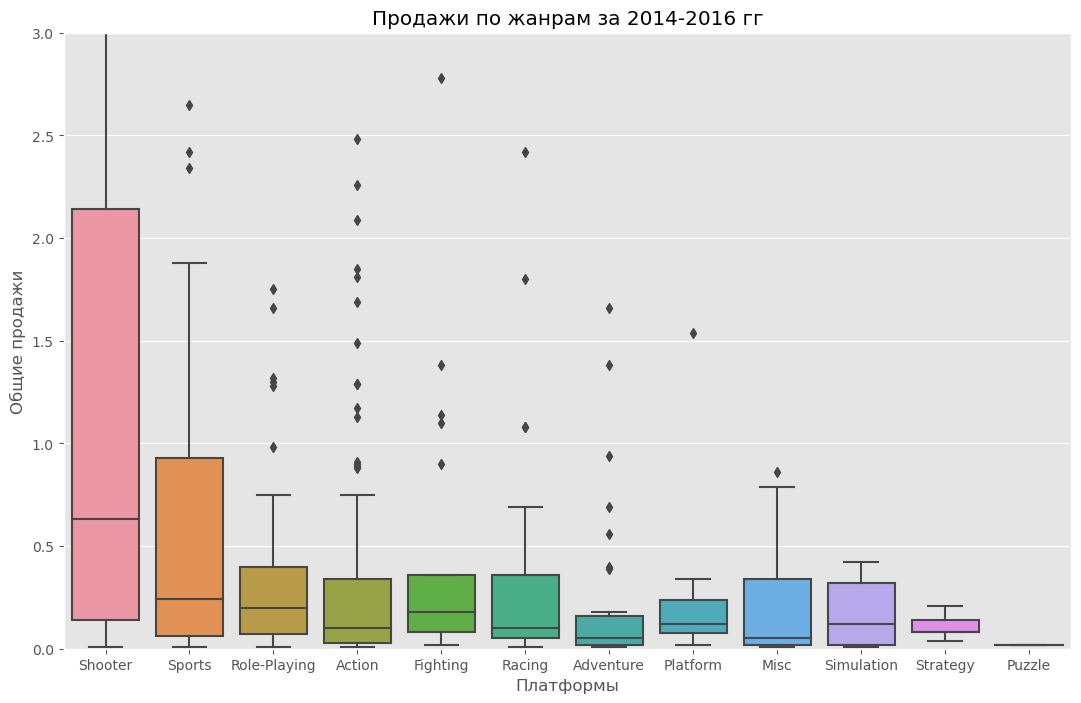

In [64]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = df_plat, y = 'sales_sum', x='genre')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

      Вывод по исследовательскому анализу данных:

- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
- Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
- Больше всего продаются игры на Sony Playstation и Xbox 360
- Nintendo WII как быстро появился также быстро и потух. Возможно потому что появился прям перед выходом мобильных приложений и игр.
- У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей



ТОП 5 можно отметить следующие жанры:

- shooter
- action
- sports
- role-playing
- misc



                               Составление портретов пользователей каждого региона
                               
                               
Определить для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [65]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
19,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
64,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
74,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98
81,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
86,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,0,0.0,0,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16415,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16419,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16426,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16428,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01


                               Рассмотрим продажи по регионам

                     NA_sales — продажи в Северной Америке (миллионы проданных копий)

<AxesSubplot:ylabel='platform'>

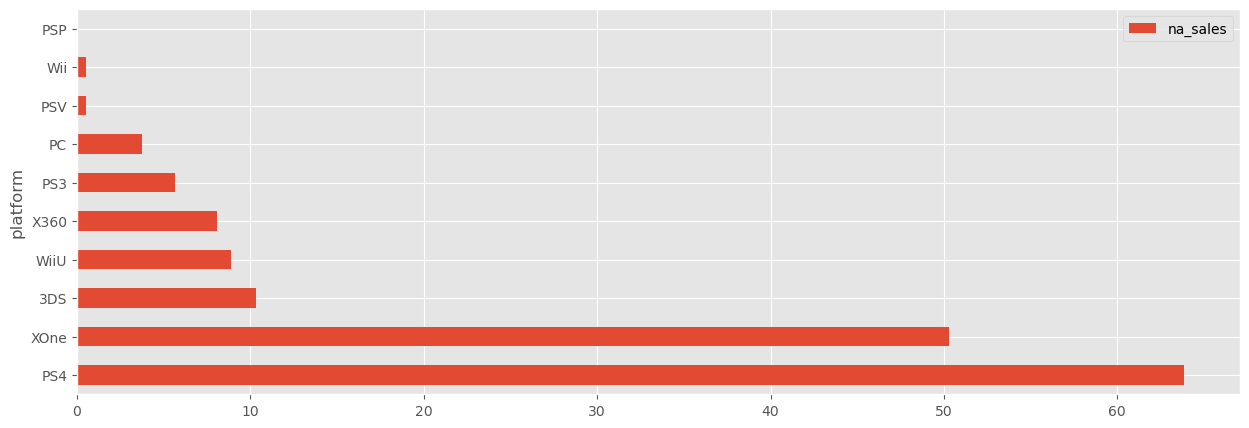

In [66]:
df.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'barh', figsize=(15,5))

<AxesSubplot:ylabel='genre'>

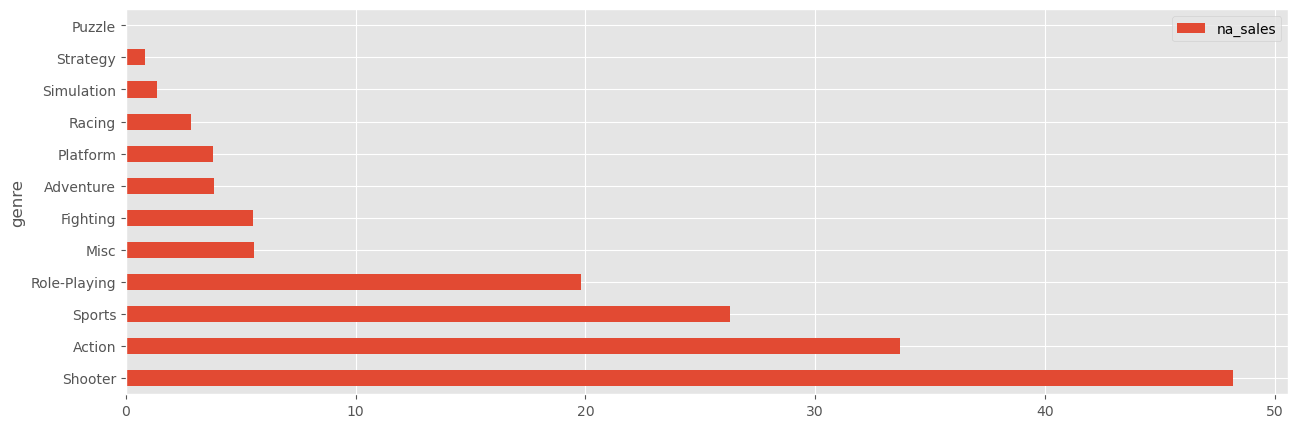

In [67]:
df.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'barh', figsize=(15,5))

<AxesSubplot:ylabel='rating'>

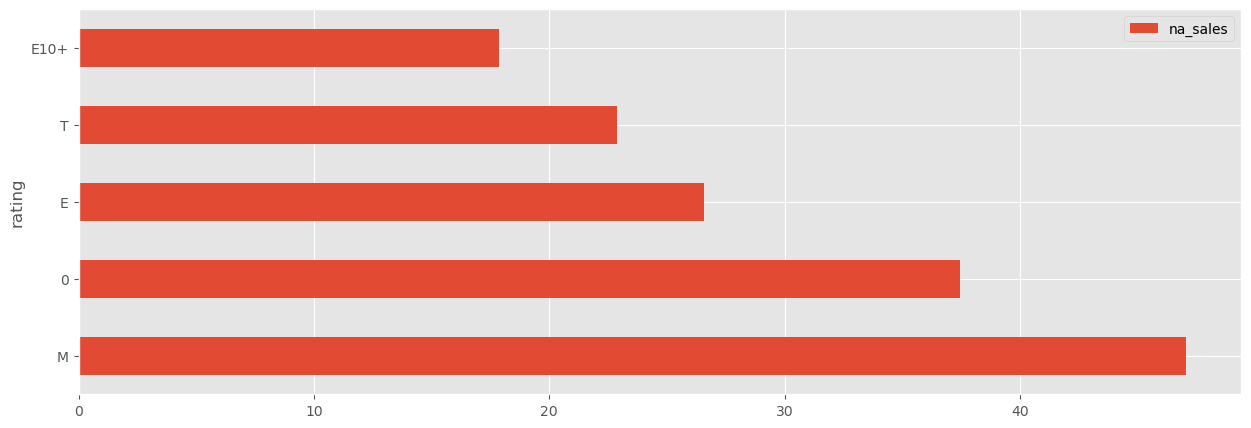

In [68]:
df.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'barh', figsize=(15,5))

Самые популярные игровые платформы в Северной Америке это:
- XBOX,
- PS2,
- WII,
- PS3,
- DS

Топ 5 жанров в Северной Америке :

- Action,
- Sports,
- Shooter,
- Platform,
- Misc

                               EU_sales — продажи в Европе (миллионы проданных копий)

<AxesSubplot:ylabel='platform'>

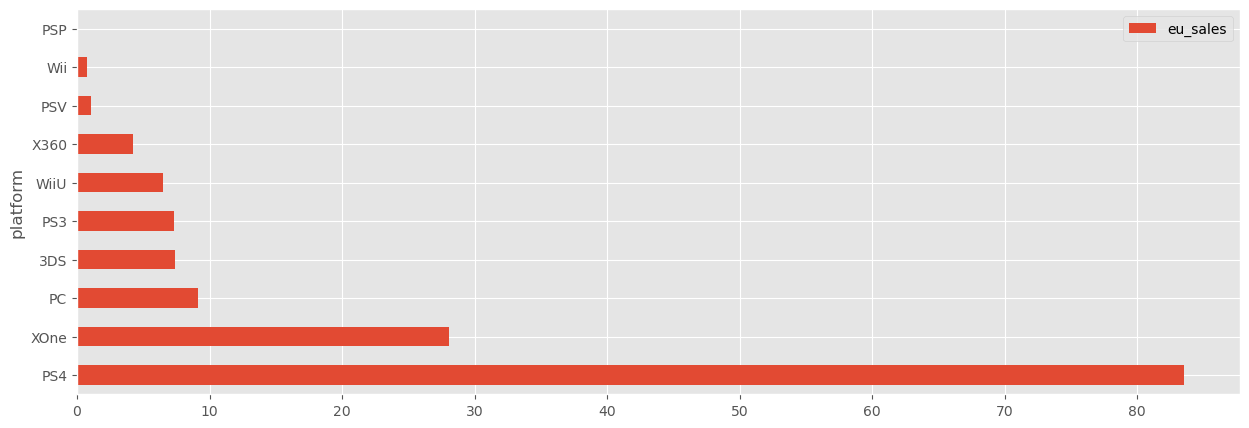

In [69]:
df.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'barh', figsize=(15,5))

<AxesSubplot:ylabel='genre'>

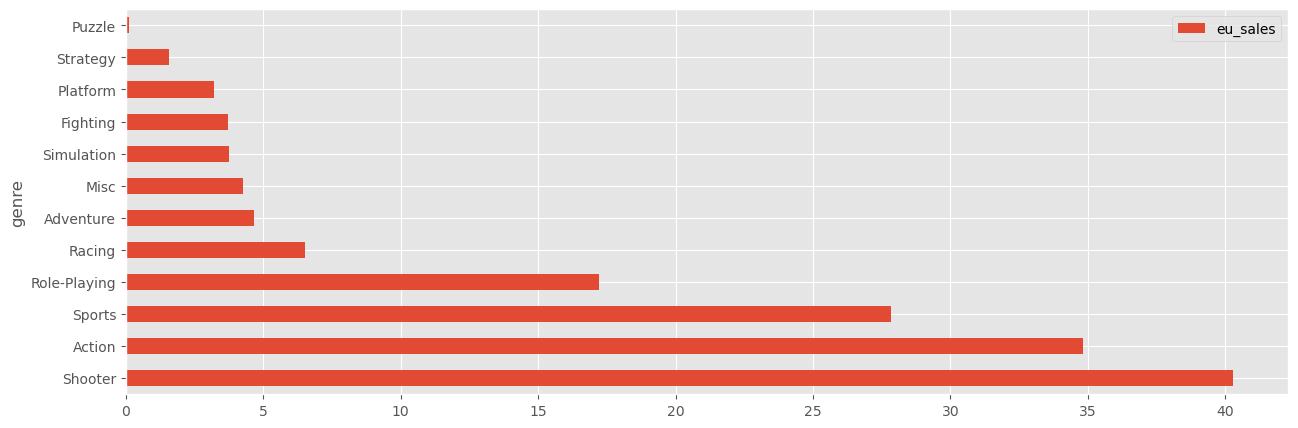

In [70]:
df.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'barh', figsize=(15,5))

<AxesSubplot:ylabel='rating'>

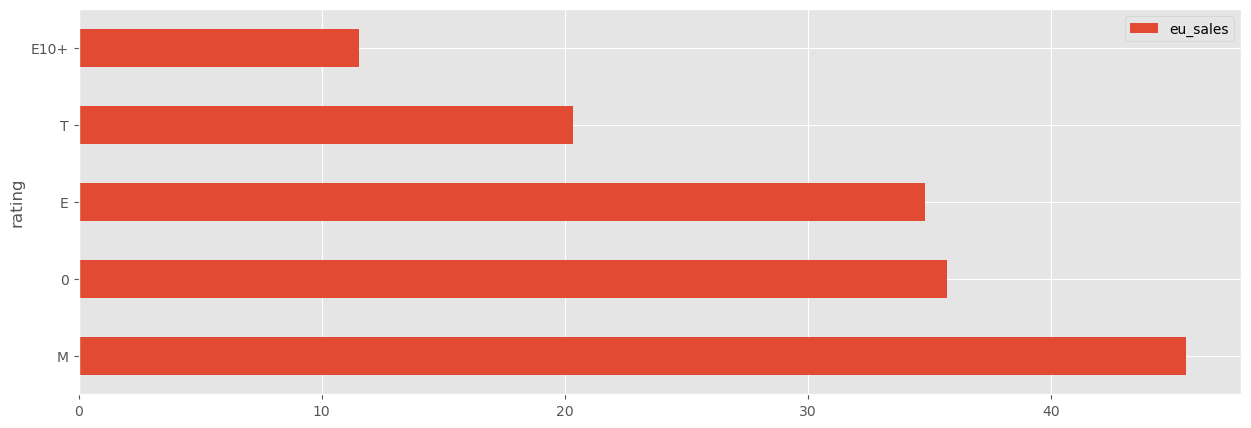

In [71]:
df.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'barh', figsize=(15,5))

Самые популярные игровые платформы в Европе это:
- PS2,
- PS3,
- XBOX,
- WII,
- PS

Топ 5 жанров в Европе :
- Action,
- Sports,
- Shooter,
- Racing,
- Misc

                            JP_sales — продажи в Японии (миллионы проданных копий)

<AxesSubplot:ylabel='platform'>

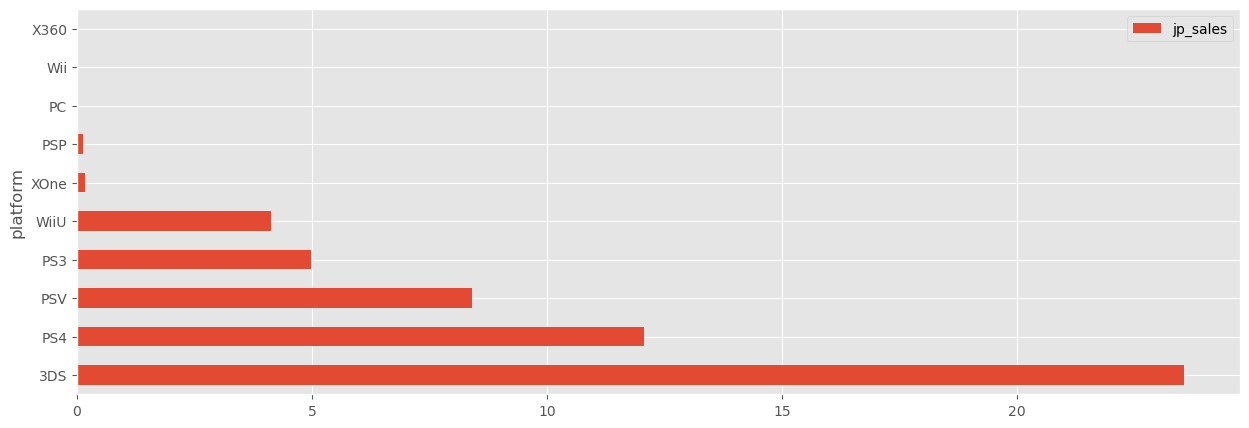

In [72]:
df.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'barh', figsize=(15,5))

<AxesSubplot:ylabel='genre'>

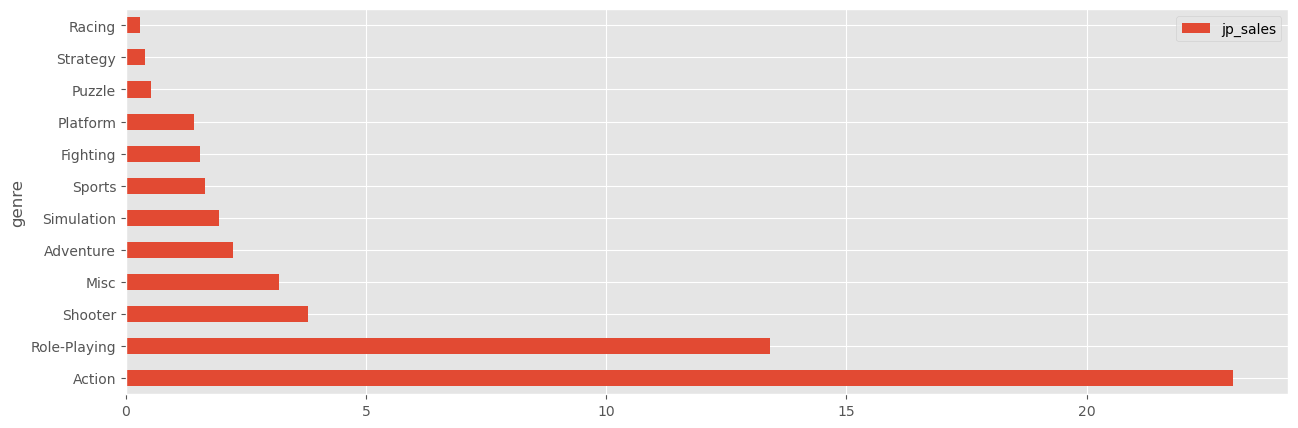

In [73]:
df.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'barh', figsize=(15,5))

<AxesSubplot:ylabel='rating'>

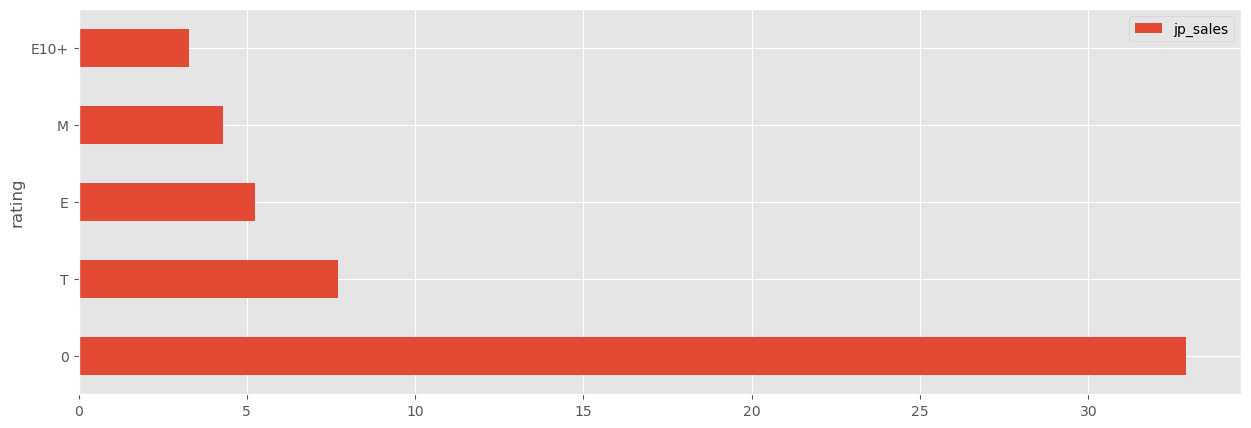

In [74]:
df.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'barh', figsize=(15,5))

Самые популярные игровые платформы в Японии это:
- DS,
- PS,
- PS2,
- SNES,
- 3DS


Топ 5 жанров в Японии :
- Role-Playing,
- Action,
- Sports,
- Platform,
- Misc

                              Other_sales — продажи в других странах (миллионы проданных копий)

<AxesSubplot:ylabel='platform'>

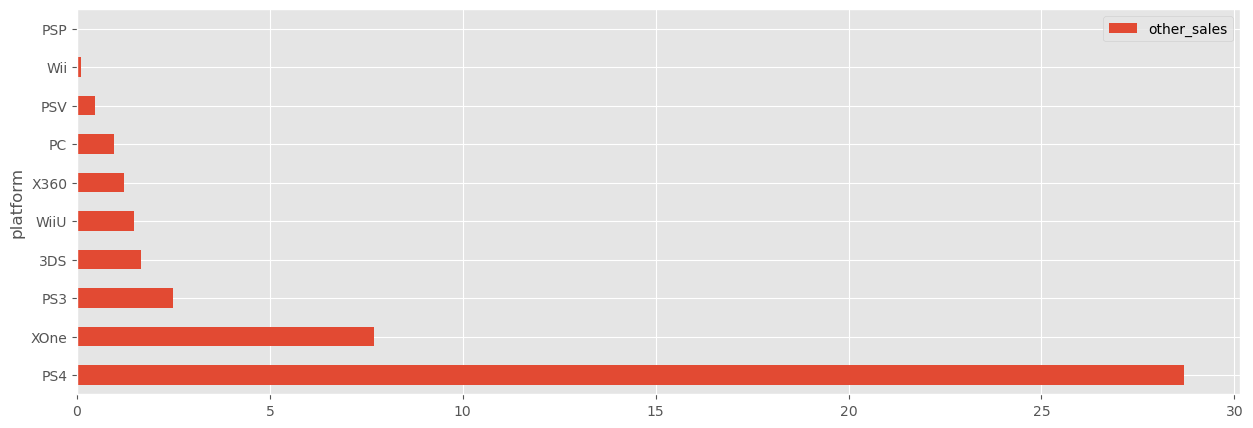

In [75]:
df.pivot_table(index = 'platform', values = 'other_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'other_sales').plot(kind = 'barh', figsize=(15,5))

<AxesSubplot:ylabel='genre'>

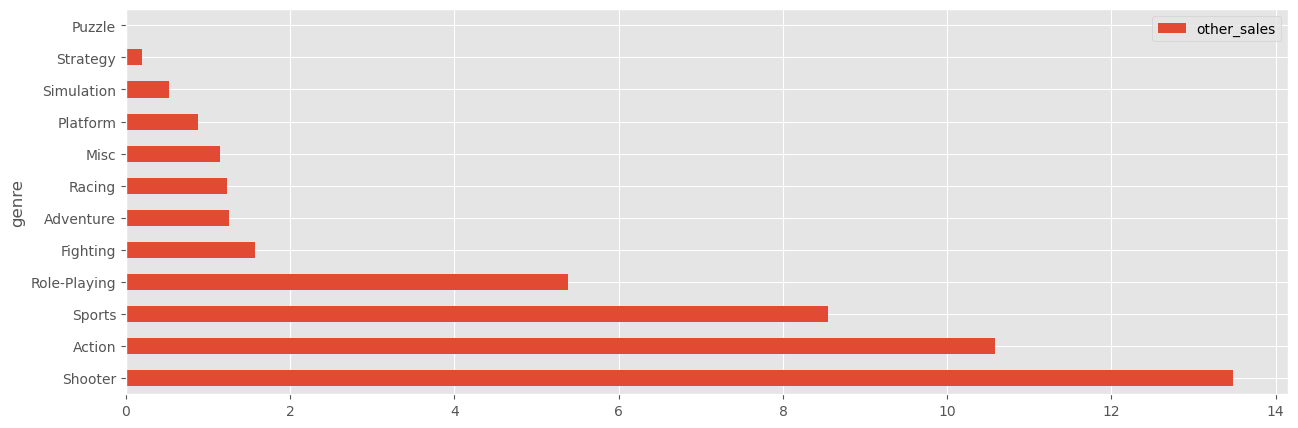

In [76]:
df.pivot_table(index = 'genre', values = 'other_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'other_sales').plot(kind = 'barh', figsize=(15,5))

<AxesSubplot:ylabel='rating'>

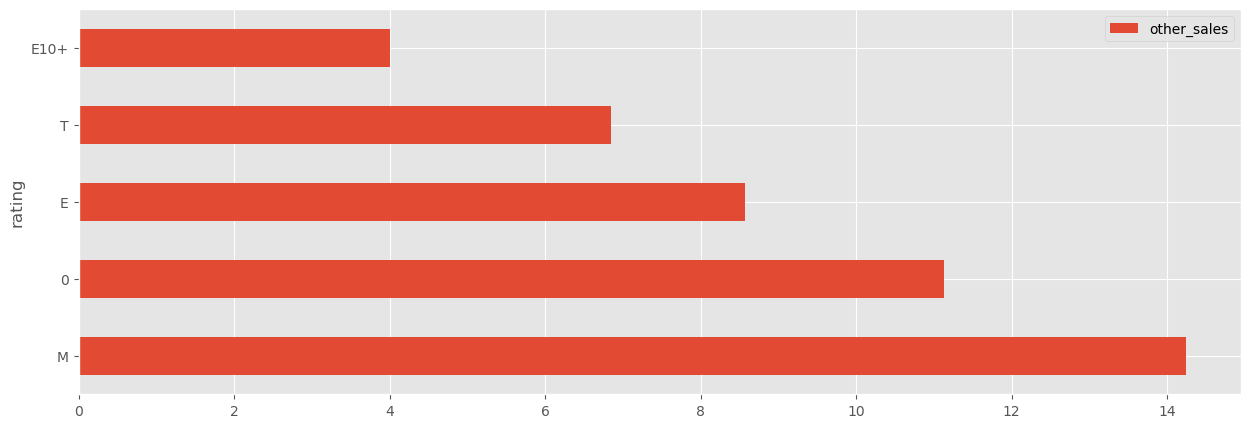

In [77]:
df.pivot_table(index = 'rating', values = 'other_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'other_sales').plot(kind = 'barh', figsize=(15,5))

Самые популярные игровые платформы в других странах это:
- PS4,
- XBOX,
- PS3,
- 3DS
- WiiU,

Топ 5 жанров :
- Shooter
- Action,
- Sports,
- Role-Playing
- Fighting

                           Вывод по составлению портрета пользователя каждого региона

                                           в Северной Америке

Самые популярные игровые платформы в Северной Америке это: 
 - XBOX,
 - PS2,
 - WII,
 - PS3,
 - DS
 
 
Топ 5 жанров в Северной Америке :
 - Action,
 - Sports,
 - Shooter,
 - Platform,
 - Misc
 
 
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

                                                в Европе 

Самые популярные игровые платформы в Европе это:
 - PS2, 
 - PS3,
 - XBOX,
 - WII,
 - PS

Топ 5 жанров в Европе :
 - Action,
 - Sports,
 - Shooter,
 - Racing,
 - Misc

По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"


                                                 в Японии

Самые популярные игровые платформы в Японии это:
 - DS,
 - PS,
 - PS2,
 - SNES,
 - 3DS

Топ 5 жанров в Японии :
 - Role-Playing,
 - Action,
 - Sports,
 - Platform,
 - Misc

По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

                                   Если брать данные за последний год:

То в Северной Америке:
 - топ игровых платформ выглядит так: PS4, Xone, DS3
 - топ Жанров игр: Shooter, Action, Sports
 - топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех"
 
 
В Европейском союзе:
 - топ игровых платформ : PS4, Xone, PC
 - топ жанров: Shooter, Sports, Action
 - топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше"
 
 
В Японии:
 - топ игровых платформ : 3DS, PS4, PSV
 - топ жанров: Action, Role-playing, Adventure
 - топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех"
 
 
Для прогноза будущих продаж лучше брать данные за последний год, так как технологии меняются с оч быстрыми темпами, и вкусы людей также могут меняться оч быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше

                                                 Проверка гипотез

In [78]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
19,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
64,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
74,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98
81,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
86,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,0,0.0,0,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16415,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16419,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16426,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16428,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01


                                               1 Гипотеза

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза - H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза - H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Сохраним в переменных x и p соответствующие данные (актуальные данные за последние 10 лет)

In [79]:
x = df[(df['platform']=='XOne') & (df['year_of_release']>2006)]['user_score']
p = df[(df['platform']=='PS4') & (df['year_of_release']>2006)]['user_score']

Посчитаем средний рейтинг пользователя для xbox платформ

In [80]:
x.mean()

4.740119760479042

Посчитаем средний рейтинг пользователя для PC платформ

In [81]:
p.mean()

4.325249169435216

In [82]:
alpha = 0.05

results = st.ttest_ind(x.dropna(), p.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.19386186173920508
Не получилось отвергнуть нулевую гипотезу


Вывод: Средние пользовательские рейтинги платформ Xbox One и PC разные

                                             2 Гипотеза 

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

Сохраним в переменных genre_a и genre_s соответствующие данные с пользовательскими оценками

In [83]:
genre_a = df[(df['platform']=='XOne') & (df['year_of_release']>2006)]['user_score']
genre_s = df[(df['platform']=='PS4') & (df['year_of_release']>2006)]['user_score']

Выведем среднюю оценку по жанру экшн

In [84]:
genre_a.mean()

4.740119760479042

Выведем среднюю оценку по жанру спорт

In [85]:
genre_s.mean()

4.325249169435216

In [86]:
alpha = 0.05

results = st.ttest_ind(genre_a.dropna(), genre_s.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.19386186173920508
Не получилось отвергнуть нулевую гипотезу


                                       Вывод по проверке гипотез

Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.

Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Нулевую гипотезу не удалось опровергнуть.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используем t-тест: scipy.stats.ttest_ind (array1, array2, equal_var).

                                        Общий вывод

Перед анализом данных, мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок и Привели к правильным типам данных необходимые столбцы. Определили, что аббревиатура TBD значит to be determined, to be done. То есть данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа

Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS

Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли Исходя из анализа мы увидели, что у Nintendo WII был резкий скачок в 2009 году и такой же резкий провал. Скорее всего потому что у людей не было особого интереса к приставке, когда как под рукой всегда был смартфон с любыми играми на вкус Проведя анализ оценок пользователей и критиков. Мы выявили, что оценки критиков и пользователей взаимосвязаны с продажами самих игр. То есть чем больше оценка критиков или пользователей, тем лучше продажа игры. Так же определили, что самый популярный жанр за все время это Экшн. На последнем месте стратегии

                             Критерии определяющие успешность игры:

1. Регион

- Рейтинг ассоциации, определяющей возрастной рейтинг компьютерных игр

- Платформа, которая наиболее распространена в данном регионе

- Жанр


2. Рейтинг критиков (влияет на количество продаж во всех регионах)


- Игры, которые будут продаваться в Северной Америке лучше всего:
ESRB: E, M, T
Платформ(в порядке убывания): Xbox360, Wii, PS3, DS
Жанры: Action, Sports, Shooter, Misc, Role-Playing


- Игры, которые будут продаваться в Европе лучше всего:
ESRB: E, M, T
Платформы: в PS3, Xbox360, Wii, DS
Жанры: Action, Sports, Shooter, Misc, Racing


- Игры, которые будут продаваться в Японии лучше всего:
ESRB: E, T, M
Платформы: DS, 3DS, PS3, PSP, Wii
Жанры: Role-Playing, Action, Misc, Sports, Platform

*Рейтинги, жанры, платформы указаны в порядке убывания*